# Purpose of this notebook:

There is a lot that goes on in the dataset class (src.data_stuff.patch_dataset) and also some glue which happens in the collation of that data so this notebook is intended to be used by the programmer to validate that the dataloader is acting correctly

Note to self: strange that all of these are rotated 90deg clockwise 👀

In [17]:
%matplotlib inline

In [6]:
import sys
sys.path.append('../')

In [112]:
import os
import torch
import torchvision
from src.data_stuff.NEW_patch_dataset import PatchDataset
from IPython.display import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [8]:
# --- hypers --- #
data_dir = '/tcmldrive/shats/mayo-datasets/num125-hi250-lo2-pct0.5-ogsz512-resz256'
batch_size = 4
group_size = 3
num_workers = 4
# ------------- #

In [9]:
train_data_dir = os.path.join(data_dir, 'train')
val_data_dir = os.path.join(data_dir, 'val')

In [119]:
### transforms ###
rgb_mean = (0.4914, 0.4822, 0.4465)
rgb_std = (0.2023, 0.1994, 0.2010)
train_transforms = torchvision.transforms.Compose([
    # torchvision.transforms.RandomCrop(32, padding=4),
#     torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
#     torchvision.transforms.Normalize(rgb_mean, rgb_std),
])
val_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
#     torchvision.transforms.Normalize(rgb_mean, rgb_std),
])

# Test Dataset

In [120]:
# dataset
train_ds = PatchDataset(train_data_dir, group_size=group_size, transform=train_transforms)
val_ds = PatchDataset(val_data_dir, group_size=group_size, transform=train_transforms)

🏛  -- class to index: {'CE': tensor(0), 'LAA': tensor(1)}
2
🏛  -- class to index: {'CE': tensor(0), 'LAA': tensor(1)}
14


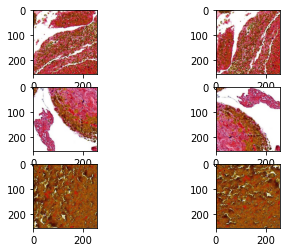

In [121]:
def test_ds_sample(ds_sample):
    patient_id = ds_sample[0]
    paths = ds_sample[1].split(',')
    label = ds_sample[2]
    patches = ds_sample[3]
    
    fig, ax = plt.subplots(patches.shape[0], 2)
    for i, (path, dataset_img) in enumerate(zip(paths, patches)):
        dataset_img = dataset_img.transpose(0, -1)
        actual_img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        ax[i][0].imshow(dataset_img)
        ax[i][1].imshow(actual_img)
    fig.show()
    
test_ds_sample(train_ds[1])

# Test Dataloaders

In [ ]:
# dataloaders
train_dl = torch.utils.data.DataLoader(
        train_ds,
        batch_size=batch_size,
        num_workers=num_workers,
        shuffle=True,
        drop_last=True
        )
val_dl = torch.utils.data.DataLoader(
        val_ds,
        batch_size=batch_size,
        num_workers=num_workers,
        shuffle=False,
        drop_last=True
        )

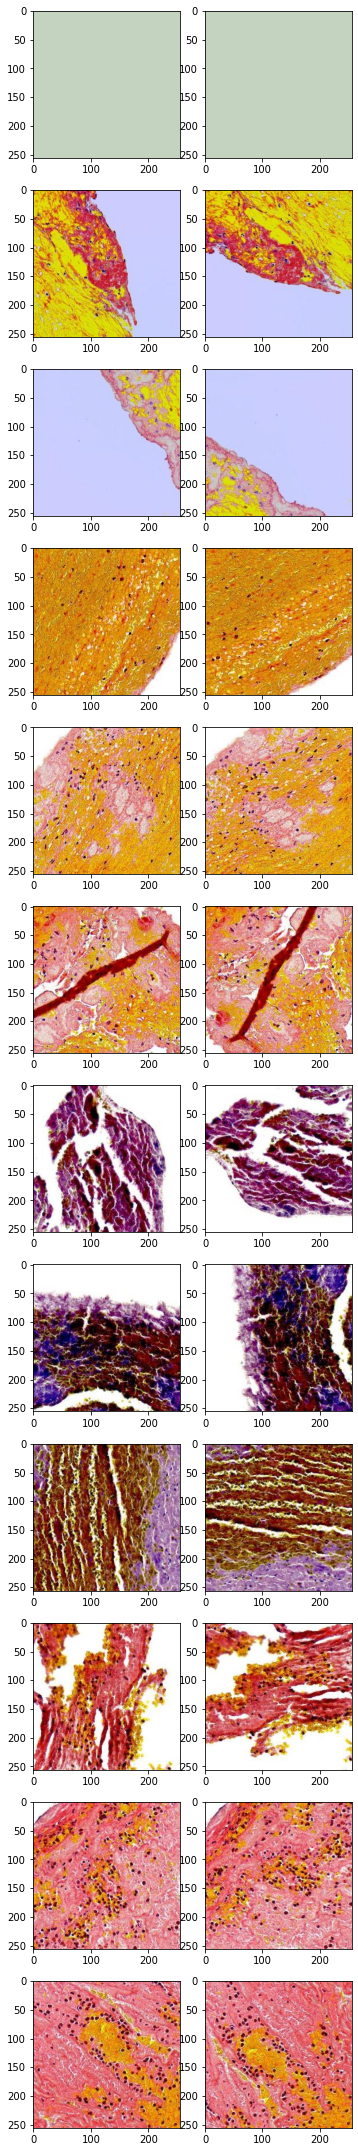

In [129]:
def test_dl_iter(dl_iter, group_size):
    img_id, img_paths, y, x = dl_iter
    x = x.view(x.shape[0]*x.shape[1], *x.shape[2:])
    img_paths_lol = [p.split(",") for p in img_paths]
    img_paths = [item for sublist in img_paths_lol for item in sublist]
    y = y.repeat_interleave(group_size)
    img_id = tuple(np.repeat(np.array(img_id), group_size))
    
    fig, ax = plt.subplots(len(img_paths), 2, figsize=(5, 30))
    for i, (path, dataset_img) in enumerate(zip(img_paths, x)):
        dataset_img = dataset_img.transpose(0, -1)
        actual_img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        ax[i][0].imshow(dataset_img)
        ax[i][1].imshow(actual_img)
    fig.tight_layout()
    plt.show()

test_dl_iter(next(iter(train_dl)), group_size)